In [ ]:
# Q2. How are the emotional tones (valence) of top-streamed and most-viewed songs distributed?

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Loading and Cleaning
filepath = '../data/Spotify_Youtube.csv'
data = pd.read_csv(filepath)
data = data.drop(columns=['Unnamed: 0', 'Url_spotify', 'Uri', 'Url_youtube', 'Description'])
data.info()
custom_palette = sns.color_palette(["#386641", "#BC4749", "#A7C957", "#F2E8CF", "#6A994E"])
sns.set_palette(custom_palette)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20716 non-null  float64
 5   Energy            20716 non-null  float64
 6   Key               20716 non-null  float64
 7   Loudness          20716 non-null  float64
 8   Speechiness       20716 non-null  float64
 9   Acousticness      20716 non-null  float64
 10  Instrumentalness  20716 non-null  float64
 11  Liveness          20716 non-null  float64
 12  Valence           20716 non-null  float64
 13  Tempo             20716 non-null  float64
 14  Duration_ms       20716 non-null  float64
 15  Title             20248 non-null  object 
 16  Channel           20248 non-null  object

In [18]:
df = data.drop(columns=["Album", "Album_type", "Key", "Loudness", "Speechiness", "Acousticness", "Instrumentalness",  
                        "Liveness", "Tempo", "Duration_ms", "Channel", "Comments", "Licensed", "official_video"])
df = df.dropna(how="any")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19624 entries, 0 to 20717
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Artist        19624 non-null  object 
 1   Track         19624 non-null  object 
 2   Danceability  19624 non-null  float64
 3   Energy        19624 non-null  float64
 4   Valence       19624 non-null  float64
 5   Title         19624 non-null  object 
 6   Views         19624 non-null  float64
 7   Likes         19624 non-null  float64
 8   Stream        19624 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.5+ MB


In [3]:
# Define popular songs using quantiles
popular_streams = df["Stream"].quantile(0.85)
popular_views = df["Views"].quantile(0.85)

df2 = df.loc[(df["Stream"] >= popular_streams) & (df["Views"] >= popular_views)]
#df2 = df.loc[df["Views"] >= popular_views]
df2.head(10)

,Artist,Track,Valence,Title,Views,Likes,Stream
0,Gorillaz,Feel Good Inc.,0.772,Gorillaz - Feel Good Inc. (Official Video),6.935552e+08,6220896.0,1.040235e+09
3,Gorillaz,On Melancholy Hill,0.578,Gorillaz - On Melancholy Hill (Official Video),2.117550e+08,1788577.0,4.346636e+08
4,Gorillaz,Clint Eastwood,0.525,Gorillaz - Clint Eastwood (Official Video),6.184810e+08,6197318.0,6.172597e+08
5,Gorillaz,DARE,0.966,Gorillaz - DARE (Official Video),2.590212e+08,1844658.0,3.238503e+08
10,Red Hot Chili Peppers,Californication,0.328,Red Hot Chili Peppers - Californication (Offic...,1.018811e+09,4394471.0,1.055738e+09
11,Red Hot Chili Peppers,Under the Bridge,0.458,Red Hot Chili Peppers - Under The Bridge [Offi...,2.466877e+08,1213572.0,1.061751e+09
12,Red Hot Chili Peppers,Can't Stop,0.875,Red Hot Chili Peppers - Can't Stop [Official M...,3.366358e+08,1740224.0,8.664650e+08
13,Red Hot Chili Peppers,Scar Tissue,0.547,Red Hot Chili Peppers - Scar Tissue [Official ...,4.351215e+08,1890900.0,6.138387e+08
14,Red Hot Chili Peppers,Otherside,0.513,Red Hot Chili Peppers - Otherside [Official Mu...,6.735287e+08,3140356.0,7.327745e+08
15,Red Hot Chili Peppers,Snow (Hey Oh),0.599,Red Hot Chili Peppers - Snow (Hey Oh) (Officia...,3.208712e+08,1272266.0,8.607223e+08


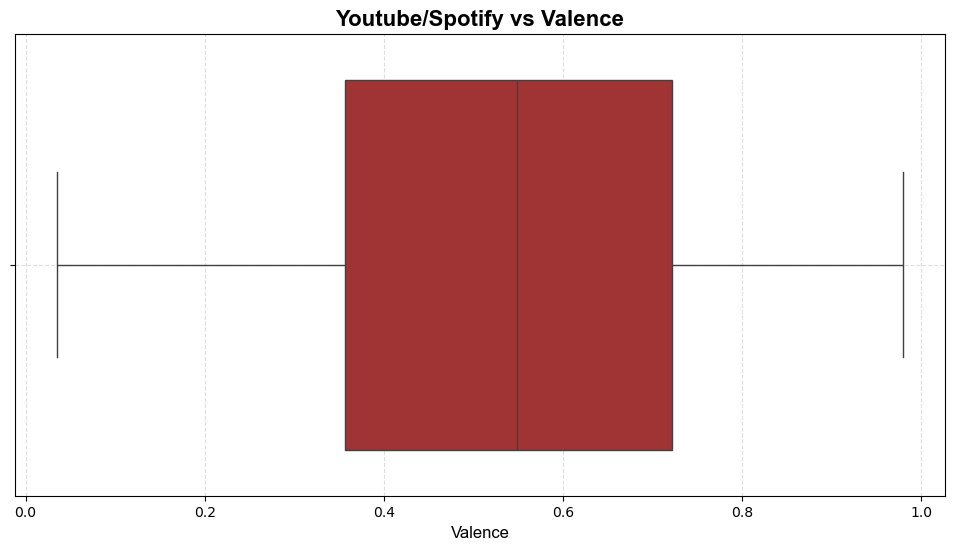

In [8]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.boxplot(data=df2, x="Valence", fill=True, color="firebrick")

# Add Labels/Title
plt.xlabel("Valence", fontfamily="Arial", fontsize=12)
plt.title("Youtube/Spotify vs Valence", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

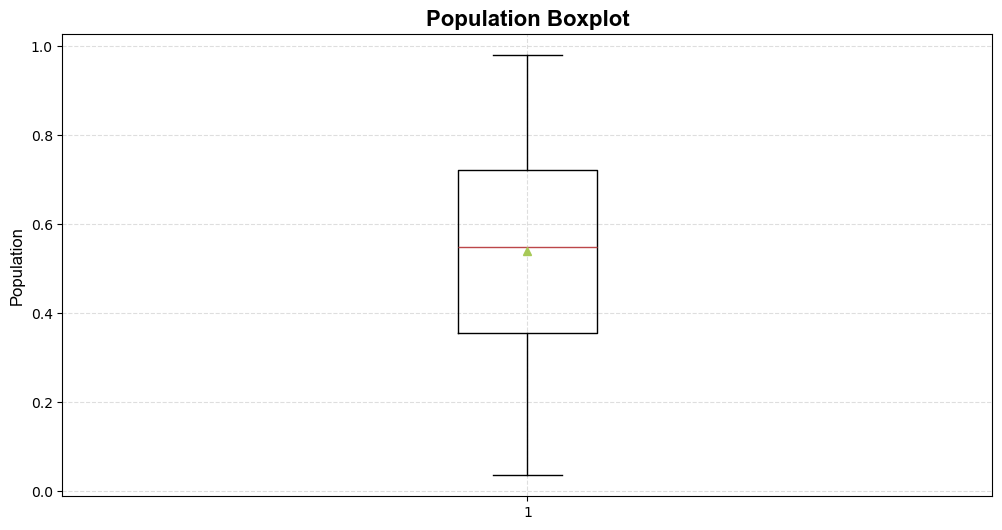

In [6]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.boxplot(df2.Valence, showmeans=True)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.ylabel("Population", fontfamily="Arial", fontsize=12)
plt.title("Population Boxplot", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

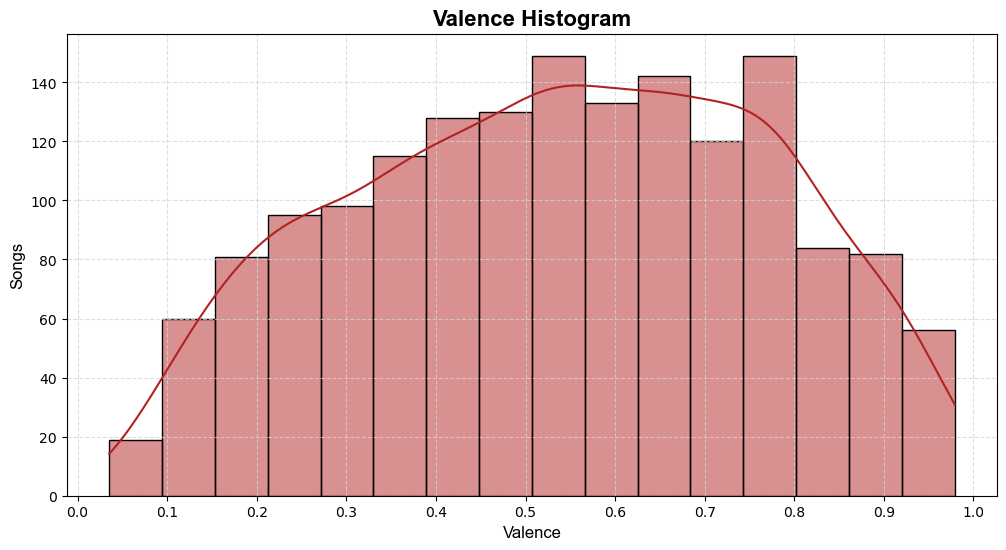

In [17]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.histplot(data=df2, x="Valence", kde=True, color="firebrick")

# Add Labels/Title
plt.xlabel("Valence", fontfamily="Arial", fontsize=12)
plt.ylabel("Songs", fontfamily="Arial", fontsize=12)
plt.title("Valence Histogram", fontweight="bold", fontsize=16, fontfamily="Arial")

# Change the interval from 0.2 to 0.1
plt.xticks([x * 0.1 for x in range(11)])

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

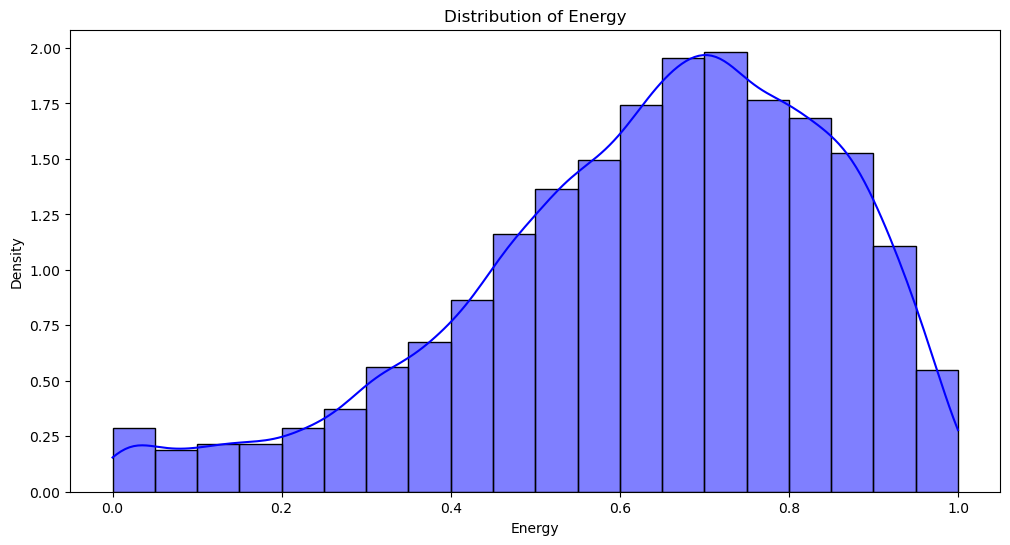

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Energy'], bins=20, kde=True, color='blue', stat='density')  # kde adds a smooth line
plt.title('Distribution of Energy')
plt.xlabel('Energy')
plt.ylabel('Density')
plt.show()

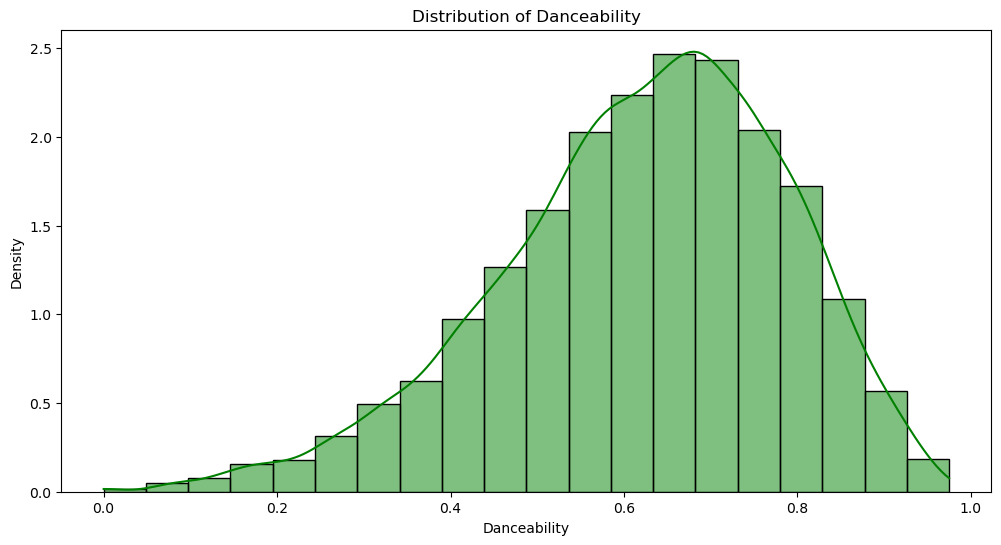

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Danceability'], bins=20, kde=True, color='green', stat='density')
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Density')
plt.show()

In [27]:
corrs = df[["Valence", "Energy", "Danceability"]].corr()
corrs

,Valence,Energy,Danceability
Valence,1.000000,0.391830,0.463392
Energy,0.391830,1.000000,0.238216
Danceability,0.463392,0.238216,1.000000


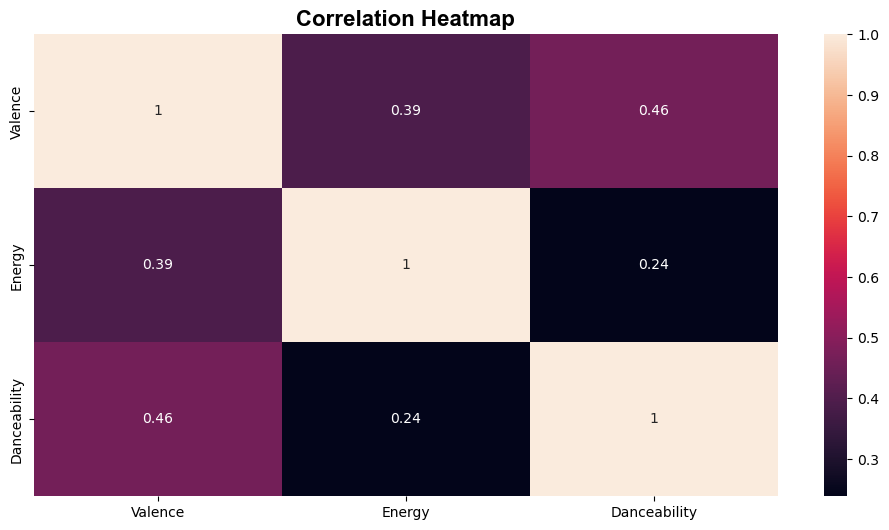

In [28]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.heatmap(corrs, annot=True)

# Customization
plt.title("Correlation Heatmap", fontweight="bold", fontsize=16, fontfamily="Arial")

# Show/Save the Graph
plt.show()

In [29]:
Q1 = df['Valence'].quantile(0.25)
Q2 = df['Valence'].quantile(0.50)  # This is also the median
Q3 = df['Valence'].quantile(0.75)

print("Q1:", Q1)
print("Q2 (Median):", Q2)
print("Q3:", Q3)

Q1: 0.338
Q2 (Median): 0.535
Q3: 0.725


In [30]:
IQR = Q3 - Q1
print("IQR:", IQR)

IQR: 0.38699999999999996


In [31]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

Lower bound: -0.24249999999999988
Upper bound: 1.3054999999999999


In [32]:
outliers = df[(df['Valence'] < lower_bound) | (df['Valence'] > upper_bound)]
print("Outliers:", outliers)

Outliers: Empty DataFrame
Columns: [Artist, Track, Danceability, Energy, Valence, Title, Views, Likes, Stream]
Index: []


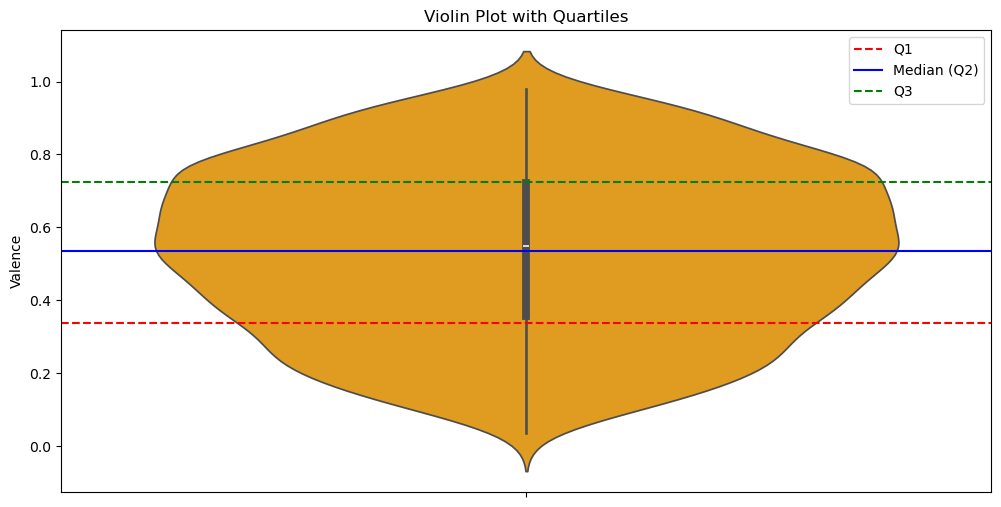

In [38]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.violinplot(data=df2, y="Valence", fill=True, color="orange")

plt.axhline(y=Q1, color='red', linestyle='--', label='Q1')
plt.axhline(y=Q2, color='blue', linestyle='-', label='Median (Q2)')
plt.axhline(y=Q3, color='green', linestyle='--', label='Q3')

plt.title('Violin Plot with Quartiles')
plt.ylabel('Valence')
plt.legend()


# Add Labels/Title
#plt.xlabel("Valence", fontfamily="Arial", fontsize=12)
#plt.title("Youtube/Spotify vs Valence", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
#plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
#plt.show()

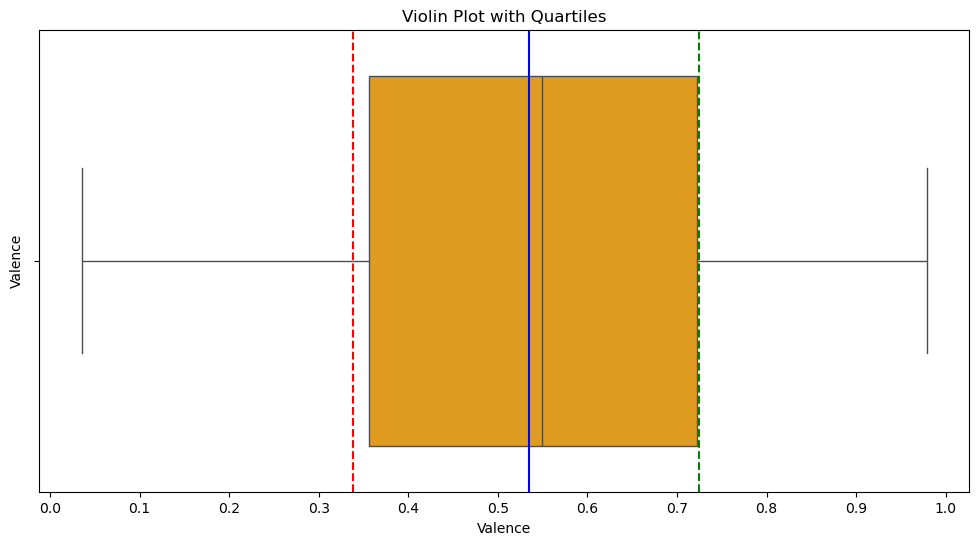

In [53]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.boxplot(data=df2, x="Valence", fill=True, color="orange")

# Customize x-axis ticks
x_ticks = np.arange(0, 1.1, 0.1)  # Create ticks from 0 to 1 with increments of 0.1
plt.xticks(x_ticks)


plt.axvline(x=Q1, color='red', linestyle='--', label='Q1')
plt.axvline(x=Q2, color='blue', linestyle='-', label='Median (Q2)')
plt.axvline(x=Q3, color='green', linestyle='--', label='Q3')

plt.title('Violin Plot with Quartiles')
plt.ylabel('Valence')
plt.show()

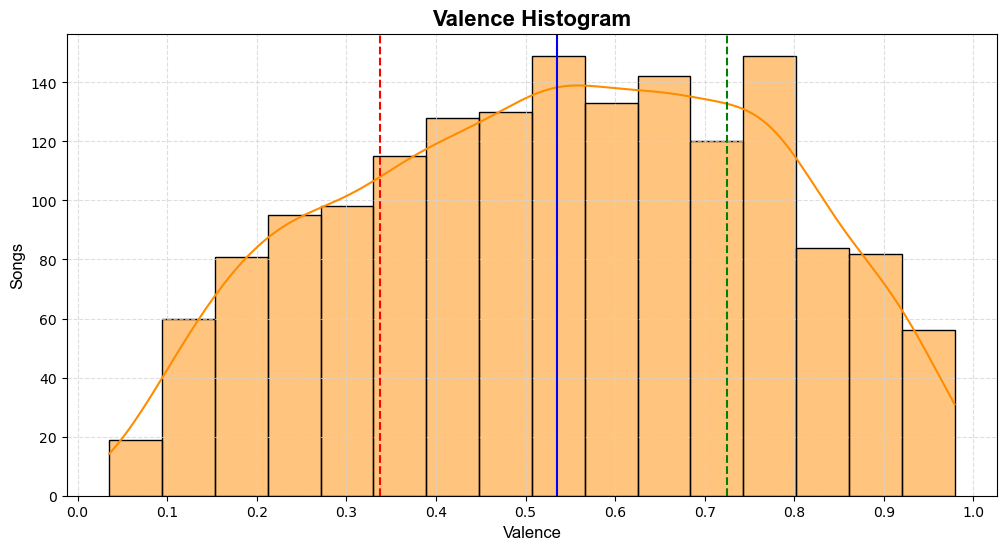

In [56]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.histplot(data=df2, x="Valence", kde=True, color="darkorange")

plt.axvline(x=Q1, color='red', linestyle='--', label='Q1')
plt.axvline(x=Q2, color='blue', linestyle='-', label='Median (Q2)')
plt.axvline(x=Q3, color='green', linestyle='--', label='Q3')

# Add Labels/Title
plt.xlabel("Valence", fontfamily="Arial", fontsize=12)
plt.ylabel("Songs", fontfamily="Arial", fontsize=12)
plt.title("Valence Histogram", fontweight="bold", fontsize=16, fontfamily="Arial")

# Change the interval from 0.2 to 0.1
plt.xticks([x * 0.1 for x in range(11)])

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()